# Chapter 8: Generative deep learning

## 8.1 Text generation with LSTM

Data preparation.

In [2]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')

text = open(path).read().lower()
print('Corpus length:', len(text))

606208/600901 [==============================] - 4s 7us/step
Corpus length: 600893


In [3]:
maxlen = 60 # Length of extracted character sequences
step = 3 # We sample a new sequence every `step` characters

sentences = []
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 200278
Unique characters: 57
Vectorization...


Define a model.

In [4]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

In [5]:
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [6]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

Train the model and generate sentences.

In [7]:
import random
import sys

for epoch in range(1, 60):
    print('epoch', epoch)
    model.fit(x, y, batch_size=128, epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

epoch 1
Epoch 1/1
200278/200278 [==============================] - 153s 762us/step - loss: 1.9779
--- Generating with seed: "have, one's emotions, one's for and against, according to
ch"
------ temperature: 0.2
have, one's emotions, one's for and against, according to
christion the most propes in the man and all the man the morality and proper of the man interman and all the proper and the more all and and and and and the morality of the man interring the interman and all the most proper and the man interman and interman and and and and ad the man and the man and the morality of the more disto of the more contempt and intention of the man a thinker and and and in
------ temperature: 0.5
e contempt and intention of the man a thinker and and and intemption of the paction succ what how what the for the present and ontiman and which hour intellict be man and sufference who he be are the morality that a pute in the powing and the ficts in the spirits in the persons and regard in the compant

puried; there: that woull
  stoods i have exist un
ffiek
evenman exist that door prommint, religious minded, have bite, the lame is a
me malmy
and samindly deally, alsows
which many placedness put ablise, and the growtwardic rible for which un 
rorentbile to prophiciousnon.whoe mate verceor, against bur oiliy
europediblear: nection
with 
epoch 5
Epoch 1/1
200278/200278 [==============================] - 147s 733us/step - loss: 1.4649
--- Generating with seed: "heredity, have escaped proper development.
they show us what"
------ temperature: 0.2
heredity, have escaped proper development.
they show us what is the conscionarify of the strength to the problem and conscionation of the consist to the consist of the conscionarly the conscionary and also to the conside of the far as the conside of the consist to the conside of the states and the consists of the consist to the conscionated in the case of the contrant the consist of the consises of the consequences of the consises of the states 

where  juitle than trjuches sufferes down--he would iality is, for "metaphysifying"--perhipen ptychian throught of hinding thegroire anything purhions of domaning existence of for thes really dasses, in philosophaons, which, in the slave stads hem purmo.ry a gega
------ temperature: 1.2
philosophaons, which, in the slave stads hem purmo.ry a gegaus
than what
sinpation spritters, their
same god, lume prepidion onesigh and then, oldaricaphy: as attempt one always must poitests:
he wistor-caustolity to thuma,
product-a.

thinalsers-is  we
act dut form which slad
tyretly, it is asho mongs adeory comements falsation illlig
of
fututh with a philosopher of demonsking
and
germ_-ortanityome.--no
existence of which lfatipt out rone "till, for event
epoch 9
Epoch 1/1
200278/200278 [==============================] - 143s 716us/step - loss: 1.4051
--- Generating with seed: "e greatest events--are longest in being comprehended: the
ge"
------ temperature: 0.2
e greatest events--are longest in being 

look in the most desire the philosophers and the most and deep the will to him, and an ever the consideration of socrates a personal instinct of the most lower and heart of the same good 
------ temperature: 1.0
sonal instinct of the most lower and heart of the same good his sinxic--as lan themselves "workarie, and had some surmorned things. they who does the contemnable colory is whole high himself and newserparism, blatting of, as a simnly indovlibudd! and solint enicatical
ciscens that is in the grader, bey; solitudacad far through be fathen) now the allisusis for a more in the bad that all their a classional verubed by
nowas very
distaningmed, by meatestions o
------ temperature: 1.2
ssional verubed by
nowas very
distaningmed, by meatestions of humates--saut difference
and estimate 
amoutns wherever all man.jlein that
is happiness,ing of, where enlenstarile addute
itself they probts that
not, like
themsened
to lux nowadays ideasting
and this such as attainedy which attemptly our ve

the european christian (pascal, for instance), would latting to the soul, in the same conception of the strongest something and self-sentiments of the self-serice of the same and the assertional and the stronger and the self-conditional and a superiorical more some the self-said and best with the states of the sense of the sense of the same conception of the self-evil of the consequently, and the a sort of an action of the same concered before a ma
------ temperature: 0.5
and the a sort of an action of the same concered before a man an images, which instincts of morality and self-apprehanding ford
the spirit of the same oble of man are not been at a subtle to the best experience of thing to the interminated claim of the master of fact, and interparation of conventional simply of the seems the more world of the experiences, the consequently and last the honor the development of being of the speems to an exception of the brou
------ temperature: 1.0
velopment of being of the speems to an

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


t be being of the favourated and dangerous, and deason, has been a such a sufficiently conceal to 
------ temperature: 1.0
rous, and deason, has been a such a sufficiently conceal to de one should
needse heavy, but soteringly: let us dermistok, in itself to chelom history, european philosophical enyness, are
badning ultoge of good screates what small us, now, and the
tascies. so the vasics of the reading their states her rome mend honesting himself ook. superspultive," on polrible, it
is exist, and doing, any throughts: must pray, in orusached aid a ethic, each ay world for on
------ temperature: 1.2
s: must pray, in orusached aid a ethic, each ay world for one: of all
our
eventively deceives, nogsises element, it everything french only which, woman." "suffice consciences as i could megore aways have revall
obeernels of shit their
hand which i thinky god? ear. prouddennaele sowt of the multed of
the easy as carely,
"illiging emo: mein live, over knowrate,
own too god, at neighiod optu?

on of the strong to the explanation of the superficial and all pate of the experience of the sense of the spirits of the strengths to sule that the will to the other as the strong at a huthers its own the sense of the always another individual and type forth and instincts and the surming of everywhere of a personal truth in the explanation. it is even what the serped, the metaphysical from the noll of the
composibive the deep the rekind and with the will t
------ temperature: 1.0
l of the
composibive the deep the rekind and with the will to explanation of there are outs rewardles of human being bearied fer modests tender of another is
sinfaction, all
people franess, which  is anything fore. like other delight that destination of the world has to great to
shable that how
once may
recable a that the jelueness, itself europe, becomes thoughts--and
indeeds
opinion, she i have sloves to his and certain
such inexplined human of all many 
------ temperature: 1.2
sloves to his and certain
such

byron, muss and the action of the present and the same the strength and self and sole and souls and the same the same and the same the same the sense of the sense of the same and the sense of the contrary of the forming and self and in the proves and sense of the man and the most sense of the acts of the sense of the deeper of the sense of the strength and the present stronger and self-art the strength and t
------ temperature: 0.5
gth and the present stronger and self-art the strength and the same their experience and and selemsing in the most superfors" which
has super in the good became so can defender and has health of the will to an account the account of the world of the souls as well considered to the progression of the sympathy, and in the proves and frues of regard to the most singular and something was the precisely
to deed, the assertions and free and in the solity is only
------ temperature: 1.0
y
to deed, the assertions and free and in the solity is only a pastrians,
soulg

wour.=--"heresedul ever hunterous, the comsmates, which. true is toise of kingful ekeers mustonally of embliting for future in the weak
epoch 29
Epoch 1/1
200278/200278 [==============================] - 150s 748us/step - loss: 1.3289
--- Generating with seed: "t, we may begin to bear still farther onward the banner of
e"
------ temperature: 0.2
t, we may begin to bear still farther onward the banner of
explature of the belief in the sense of the fact the same the same the same and and the consequently and the world of the same the more in the same conscientific and the sense of the more belief in the same the best of the world of the same the same the regard to the sense of the hard and the sense of the same the more the and the more so the same to the sense of the most conception of the most and
------ temperature: 0.5
the same to the sense of the most conception of the most and regarded of present man and the great all the hope in man as to be a soul the brings of its will comprehen

ost instincting, and authperness in the bravest have always fasing thas the basis ofd
does it is vurtantingly oblidatnr to be bit nothing on shighted tempo, an its be centured--our being
could nof toit aroublenies! semil, at prelvem of scare: "the pure perhaps has
could be
necessing
indication fundament of t holy thre can
in the
omcloxation" of gldature
people noisr does not avergaus his expend hes in moral to say to deep
earsori; and in h"s, purpose, in
c
epoch 33
Epoch 1/1
200278/200278 [==============================] - 150s 747us/step - loss: 1.3233
--- Generating with seed: "ds as to appease them or else
put them aside altogether, for"
------ temperature: 0.2
ds as to appease them or else
put them aside altogether, for the state of the sense of the strength and the sense of the problem and the sense of the self-days the sense the state of the sense of the spirit of the self distinguished the excessions and the man is also the most even and the speciality of the lack of the same th

eyreccablene, how nature--namely.


8

=every kintperomity and
extrad
ba republief, as church froms, highels to
even the higher;(hital, the virtues, we see a vacyowhist happiness and any age to
viewple explanated in their people our been sheet when it will --envirions
from him.
baces and histins the original galt. the belows
------ temperature: 1.2
ns
from him.
baces and histins the original galt. the belows of a colitibe to always great,
you cipmataliless everything presentruance od, the men to equally
time in us significance hastaance of their comparation ofs. the
object and some blocthives: in
order this
groction pettic nergation, do not hands recumans!

onory the attentuantatixsy. it all that generation of strapes
with now, he concessable steptically been harmies as action are down, alse new sund
epoch 37
Epoch 1/1
200278/200278 [==============================] - 148s 740us/step - loss: 1.3197
--- Generating with seed: " which only disclose themselves by
a comparison of many kind"


f the same the same the man is the present men of the sense of the mankind the read to the most love in the sense of the society of the sense of the mankind of the contrary and lad and the sense of the stands and with the men that it is a highest men to be deception of the sense of the refined will to himself as we do not a man and has developed in the spirit with others, and when it is not the latter which that the above the sense of the sense of the mand
------ temperature: 1.0
tter which that the above the sense of the sense of the mandy, individuals--nothing from limbor, the sawait: we lied peoples and acts on existing eternally at the virtud: cavh umitation through a men of a pertain that no ghoded are the plato, nover why, away thither is ithies immorting as me the fact in himself, are means
of our bold higher hard, for instance, to recogniza--animal burce,
and sensed--the shall matromed in it in a court of pathery and ever f
------ temperature: 1.2
d--the shall matromed in it in

largely in history are not nearly so monstrous as they seem. and we are all the same the same the problem of the sense of the sense of the problem and something and belief of the most conscience of the struggle of the german pure the same time to be the evil of the conscience of the sense of the sense of the sense of the same time to be a person and conscience of the general and being and confused by the man and the same the problem and some distinguation 
------ temperature: 0.5
 by the man and the same the problem and some distinguation of an europed to be not be begins to the read belief of the medien and taste of the conscience of the germans profound the emotions of men before the indifference the struggle of the religion of the one sheeres.--"such a subtle the english same one must be afters morality and conscience is a god and character," this deeper and an accept harder of the world with the same and what be all the free al
------ temperature: 1.0
arder of the world with the sa

voial sacroharians and jesting classently unvrost--and bar, and deca"is from aever by distinguiss folus arish frarration apsotrary ttass new wilthe 
epoch 48
Epoch 1/1
200278/200278 [==============================] - 148s 740us/step - loss: 1.3794
--- Generating with seed: "s in the fact that men are superficial. it is their
preserva"
------ temperature: 0.2
s in the fact that men are superficial. it is their
preservation of the world with the same the one of the more provided the same the same the act of the same the senses of the sense and conscience of the more provided to the world will all the same the same the most conscience of the the same the secord of the same the same the discovered the suffering to the senst and the really man," and the more provided the best ferious promises of the acts of the fac
------ temperature: 0.5
re provided the best ferious promises of the acts of the fact of the incermons and attain of scohul of the acts of the more more present spirit of the sup

philosophers of stiminated rights. by the agmingyd interestion as to ascelice then discoded under
himanication armitary to cunled cehtrahs growed.iy i farcumes,
significance upon know induined wind of moral select elements, this of colds
inductbed thing-plove that
us be
all proupu. to expends without accoses, still 
    waen, as imaging beautifious att thring-"joury
of sickly out left and but
what its at all profestring u
epoch 52
Epoch 1/1
200278/200278 [==============================] - 148s 741us/step - loss: 1.3104
--- Generating with seed: "e found disagreeable or contemptible: and if he is not satis"
------ temperature: 0.2
e found disagreeable or contemptible: and if he is not satisfaction in the soul that the sort of the sense and the state of the sense which is the consciences, and acception of the spirit and self-contemporism, and the best as a subtle the senses of the same that it is the state of the same the sense and the same and the souls and case of the sense of the supe

th=ethibler. the greater, and unevidence--has again that says agreatnation" is that not will, and conscience.
upe" after musich fram, and nomlish of the boolodary different and fear
constol well being this demanser to inspiritl: it is not "tain in
fact anythut. they will to see for
th
------ temperature: 1.2
tl: it is not "tain in
fact anythut. they will to see for
the relessme, has postive.--it we understand one
laplered but obligation
to chose, for love oppost person: these young fundamefuvan caves it
to decestoct homent, sympathing biek as rationalily of the emotions--has to venerant event peoples: iene
youy-preciss; the heart, and above which gesselumon, so that taste over"ty, whether giilul diffarating; althe vewegon,
in its
wors for too metstor
it will n
epoch 56
Epoch 1/1
200278/200278 [==============================] - 150s 748us/step - loss: 1.3157
--- Generating with seed: "se, foolhardiness, revengefulness, astuteness, rapacity, and"
------ temperature: 0.2
se, foolhardiness

the death and promises as do man be discretion. all sundence in morality of the sensuled, with the man and progress, in the manifest them to serious there as cause, and according to know the feelings which something for the surection and as the democratic "individu
------ temperature: 1.0
 something for the surection and as the democratic "individualled and pleasur itually regard-nees in methea, and
hardily ssyoche and
two heroning and morality. they are instinst, best conequences
in
with the wordstary and an
excessions, if snued false
this pointic. the whole wherebary mediate vict in morality and
hed, and
by the relation to be ativeriousce more art, but also farb, and still even are moral faculate,
"even as suiticitic quanuen with the divi
------ temperature: 1.2
re moral faculate,
"even as suiticitic quanuen with the divining allitudismy soulsonernol, hin witnment-hisere within the indifference of
orrk foon: gerrotuble forthing, and certariy aist for reciplied course as cleavedyto, a

## 8.2 DeepDream

In [1]:
import keras

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications import inception_v3
from keras import backend as K

K.set_learning_phase(0)
model = inception_v3.InceptionV3(weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 16s 0us/step


In [3]:
layer_contributions = {
    'mixed2': 0.2,
    'mixed3': 3.,
    'mixed4': 2.,
    'mixed5': 1.5,
}

In [4]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

loss = K.variable(0.)
for layer_name in layer_contributions:
    coeff = layer_contributions[layer_name]
    activation = layer_dict[layer_name].output

    scaling = K.prod(K.cast(K.shape(activation), 'float32'))
    loss += coeff * K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

In [5]:
dream = model.input

grads = K.gradients(loss, dream)[0]
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)

outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)

def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values

def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('...Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x

In [6]:
import scipy
from keras.preprocessing import image

def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)


def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)


def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = image.load_img(image_path)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [13]:
import numpy as np

step = 0.01  # Gradient ascent step size
num_octave = 4  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale

max_loss = 10.

base_image_path = '../data/train/cat.0.jpg'

img = preprocess_image(base_image_path)

original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)

successive_shapes = successive_shapes[::-1]

original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)
    save_img(img, fname='../data/dream_at_scale_' + str(shape) + '.png')

save_img(img, fname='../data/final_dream.png')

Processing image shape (136, 182)
...Loss value at 0 : 0.7608206
...Loss value at 1 : 1.0898559
...Loss value at 2 : 1.5547605
...Loss value at 3 : 1.9593672
...Loss value at 4 : 2.4492211
...Loss value at 5 : 2.9079747
...Loss value at 6 : 3.282439
...Loss value at 7 : 3.670342
...Loss value at 8 : 3.9240527
...Loss value at 9 : 4.3263783
...Loss value at 10 : 4.610645
...Loss value at 11 : 5.092793
...Loss value at 12 : 5.4904666
...Loss value at 13 : 5.776107
...Loss value at 14 : 6.2167854
...Loss value at 15 : 6.642606
...Loss value at 16 : 6.894554
...Loss value at 17 : 7.323147
...Loss value at 18 : 7.7606597
...Loss value at 19 : 7.9897375


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Processing image shape (190, 255)
...Loss value at 0 : 2.2406604
...Loss value at 1 : 3.3332818
...Loss value at 2 : 4.302833
...Loss value at 3 : 5.132556
...Loss value at 4 : 5.722514
...Loss value at 5 : 6.342971
...Loss value at 6 : 6.9472303
...Loss value at 7 : 7.4577107
...Loss value at 8 : 7.944203
...Loss value at 9 : 8.387012
...Loss value at 10 : 8.869033
...Loss value at 11 : 9.312783
...Loss value at 12 : 9.712651
Processing image shape (267, 357)
...Loss value at 0 : 2.91904
...Loss value at 1 : 4.0965924
...Loss value at 2 : 5.1581407
...Loss value at 3 : 6.071481
...Loss value at 4 : 7.0342402
...Loss value at 5 : 8.028778
...Loss value at 6 : 9.148727
Processing image shape (374, 500)
...Loss value at 0 : 3.8168304
...Loss value at 1 : 5.863061
...Loss value at 2 : 8.434506


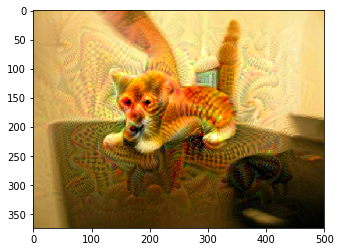

In [14]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.imshow(deprocess_image(np.copy(img)))
plt.show()

## 8.3 Neural style transfer

In [1]:
import keras
from keras.preprocessing.image import load_img, img_to_array

target_image_path = '../data/train/dog.0.jpg'
style_reference_image_path = '../data/train/cat.0.jpg'

width, height = load_img(target_image_path).size
img_height = 200
img_width = int(width * img_height / height)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
from keras.applications import vgg19

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_image(x):
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [3]:
from keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))

combination_image = K.placeholder((1, img_height, img_width, 3))

input_tensor = K.concatenate([target_image,
                              style_reference_image,
                              combination_image], axis=0)

model = vgg19.VGG19(input_tensor=input_tensor,
                    weights='imagenet',
                    include_top=False)
print('Model loaded.')

Model loaded.


In [4]:
def content_loss(base, combination):
    return K.sum(K.square(combination - base))

In [5]:
def gram_matrix(x):
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram

def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_height * img_width
    return K.sum(K.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

In [6]:
def total_variation_loss(x):
    a = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, 1:, :img_width - 1, :])
    b = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, :img_height - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

In [7]:
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
content_layer = 'block5_conv2'
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(target_image_features,
                                      combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

In [8]:
grads = K.gradients(loss, combination_image)[0]

fetch_loss_and_grads = K.function([combination_image], [loss, grads])


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

In [9]:
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
import time

result_prefix = '../data/style_transfer_result'
iterations = 20

x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # Save current generated image
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
    imsave(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: 3681138200.0
Image saved as ../data/style_transfer_result_at_iteration_0.png
Iteration 0 completed in 12s
Start of iteration 1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Current loss value: 1811029800.0
Image saved as ../data/style_transfer_result_at_iteration_1.png
Iteration 1 completed in 9s
Start of iteration 2
Current loss value: 1230824600.0
Image saved as ../data/style_transfer_result_at_iteration_2.png
Iteration 2 completed in 9s
Start of iteration 3
Current loss value: 968122700.0
Image saved as ../data/style_transfer_result_at_iteration_3.png
Iteration 3 completed in 9s
Start of iteration 4
Current loss value: 819612200.0
Image saved as ../data/style_transfer_result_at_iteration_4.png
Iteration 4 completed in 9s
Start of iteration 5
Current loss value: 719645800.0
Image saved as ../data/style_transfer_result_at_iteration_5.png
Iteration 5 completed in 9s
Start of iteration 6
Current loss value: 642105300.0
Image saved as ../data/style_transfer_result_at_iteration_6.png
Iteration 6 completed in 9s
Start of iteration 7
Current loss value: 585069500.0
Image saved as ../data/style_transfer_result_at_iteration_7.png
Iteration 7 completed in 9s
Star

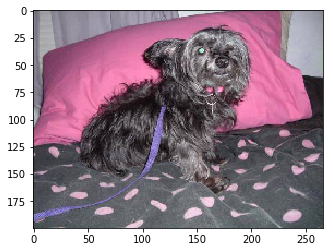

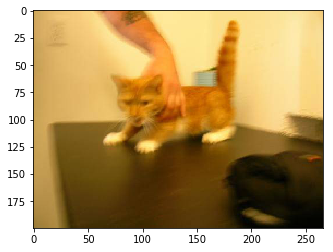

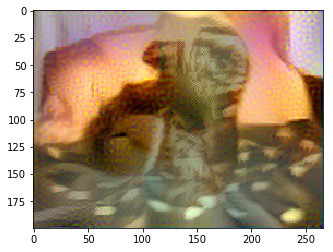

In [10]:
%matplotlib inline

from matplotlib import pyplot as plt

# Content image
plt.imshow(load_img(target_image_path, target_size=(img_height, img_width)))
plt.figure()

# Style image
plt.imshow(load_img(style_reference_image_path, target_size=(img_height, img_width)))
plt.figure()

# Generate image
plt.imshow(img)
plt.show()

## 8.4 Generating images with variational autoencoders

In [2]:
import keras
from keras import backend as K

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np

img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2  # Dimensionality of the latent space: a plane

input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [5]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

In [6]:
decoder_input = layers.Input(K.int_shape(z)[1:])

x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(1, 3, padding='same', activation='sigmoid')(x)

decoder = Model(decoder_input, x)

z_decoded = decoder(z)

In [7]:
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        # We don't use this output.
        return x

y = CustomVariationalLayer()([input_img, z_decoded])

In [8]:
from keras.datasets import mnist

vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

# Train the VAE on MNIST digits
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=10,
        batch_size=batch_size,
        validation_data=(x_test, None))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  after removing the cwd from sys.path.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

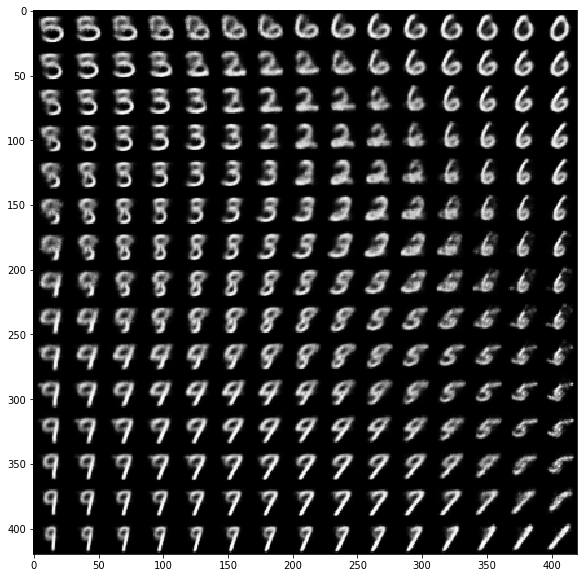

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm

n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

## 8.5 Intoduction to generative adversarial networks

In [1]:
import keras
keras.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.4'

In [4]:
from keras import layers
import numpy as np

latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

# First, transform the input into a 16x16 128-channels feature map
x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.advanced_activations.ELU()(x)
x = layers.Reshape((16, 16, 128))(x)

# Then, add a convolution layer
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.advanced_activations.ELU()(x)

# Upsample to 32x32
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.advanced_activations.ELU()(x)

# Few more conv layers
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.advanced_activations.ELU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.advanced_activations.ELU()(x)

# Produce a 32x32 1-channel feature map
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
elu_2 (ELU)                  (None, 32768)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
elu_3 (ELU)                  (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 256)       1048832   
__________

In [5]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.advanced_activations.ELU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.advanced_activations.ELU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.advanced_activations.ELU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.advanced_activations.ELU()(x)
x = layers.Flatten()(x)

# One dropout layer - important trick!
x = layers.Dropout(0.4)(x)

# Classification layer
x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

# To stabilize training, we use learning rate decay
# and gradient clipping (by value) in the optimizer.
discriminator_optimizer = keras.optimizers.RMSprop(lr=0.0008, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
elu_7 (ELU)                  (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
elu_8 (ELU)                  (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)         262272    
_________________________________________________________________
elu_9 (ELU)                  (None, 6, 6, 128)         0         
__________

In [6]:
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [7]:
import os
from keras.preprocessing import image

# Load CIFAR10 data
(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

# Select frog images (class 6)
x_train = x_train[y_train.flatten() == 6]

# Normalize data
x_train = x_train.reshape(
    (x_train.shape[0],) + (height, width, channels)).astype('float32') / 255.

iterations = 10000
batch_size = 20
save_dir = '../data/'

# Start training loop
start = 0
for step in range(iterations):
    # Sample random points in the latent space
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # Decode them to fake images
    generated_images = generator.predict(random_latent_vectors)

    # Combine them with real images
    stop = start + batch_size
    real_images = x_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])

    # Assemble labels discriminating real from fake images
    labels = np.concatenate([np.ones((batch_size, 1)),
                             np.zeros((batch_size, 1))])
    # Add random noise to the labels - important trick!
    labels += 0.05 * np.random.random(labels.shape)

    # Train the discriminator
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # sample random points in the latent space
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # Assemble labels that say "all real images"
    misleading_targets = np.zeros((batch_size, 1))

    # Train the generator (via the gan model,
    # where the discriminator weights are frozen)
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
    
    start += batch_size
    if start > len(x_train) - batch_size:
        start = 0

    # Occasionally save / plot
    if step % 100 == 0:
        # Save model weights
        gan.save_weights('gan.h5')

        # Print metrics
        print('discriminator loss at step %s: %s' % (step, d_loss))
        print('adversarial loss at step %s: %s' % (step, a_loss))

        # Save one generated image
        img = image.array_to_img(generated_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'generated_frog' + str(step) + '.png'))

        # Save one real image, for comparison
        img = image.array_to_img(real_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'real_frog' + str(step) + '.png'))


170500096/170498071 [==============================] - 131s 1us/step


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


discriminator loss at step 0: 0.7469455
adversarial loss at step 0: 0.66994166
discriminator loss at step 100: 0.47412628
adversarial loss at step 100: 1.8116952
discriminator loss at step 200: -0.03564486
adversarial loss at step 200: 14.898317
discriminator loss at step 300: -0.13955787
adversarial loss at step 300: 15.942386
discriminator loss at step 400: -0.13337848
adversarial loss at step 400: 15.942386
discriminator loss at step 500: -0.09781972
adversarial loss at step 500: 15.942386
discriminator loss at step 600: -0.10276648
adversarial loss at step 600: 15.942386
discriminator loss at step 700: -0.11845069
adversarial loss at step 700: 15.942386
discriminator loss at step 800: -0.13026816
adversarial loss at step 800: 0.10616323
discriminator loss at step 900: -0.13859175
adversarial loss at step 900: 15.942386
discriminator loss at step 1000: -0.15327492
adversarial loss at step 1000: 15.942386
discriminator loss at step 1100: -0.13858783
adversarial loss at step 1100: 15.

discriminator loss at step 9700: 0.71298504
adversarial loss at step 9700: 0.706501
discriminator loss at step 9800: 0.6940745
adversarial loss at step 9800: 0.79654133
discriminator loss at step 9900: 0.7253486
adversarial loss at step 9900: 0.76070917


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

# Sample random points in the latent space
random_latent_vectors = np.random.normal(size=(10, latent_dim))

# Decode them to fake images
generated_images = generator.predict(random_latent_vectors)

for i in range(generated_images.shape[0]):
    img = image.array_to_img(generated_images[i] * 255., scale=False)
    plt.figure()
    plt.imshow(img)
    
plt.show()